# 19 Sklearn Iris Data Cleaning

Real world data is messy. Missing values, wrong data types.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
pd.__version__

'0.23.4'

# Load data

In [4]:
!head data/iris_dirty.csv

5.1,3.5,1.4,2 mm,Iris-setosa
4.9,3.0,1.4,2 mm,Iris-setosa
4.7,3.2,1.3,2 mm,Iris-setosa
4.6,3.1,1.5,2 mm,Iris-setosa
5.0,3.6,1.4,2 mm,Iris-setosa
5.4,3.9,1.7,4 mm,Iris-setosa
4.6,3.4,1.4,3 mm,Iris-setosa
5.0,3.4,1.5,2 mm,Iris-setosa
4.4,2.9,1.4,2 mm,Iris-setosa
4.9,3.1,1.5,1 mm,Iris-setosa


In [5]:
df = pd.read_csv("data/iris_dirty.csv", header=None, names=["sl", "sw", "pl", "pw", "class"])

In [6]:
df.head()

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


In [7]:
df.count()

sl       151
sw       150
pl       151
pw       151
class    151
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
sl       151 non-null float64
sw       150 non-null float64
pl       151 non-null float64
pw       151 non-null object
class    151 non-null object
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


In [9]:
df['sw']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3.8
19     3.8
20     3.4
21     3.7
22     3.6
23     3.3
24     3.4
25     3.0
26     3.4
27     3.5
28     3.4
29     3.2
      ... 
121    3.2
122    2.8
123    2.8
124    2.7
125    3.3
126    3.2
127    2.8
128    3.0
129    2.8
130    3.0
131    2.8
132    3.8
133    2.8
134    2.8
135    2.6
136    3.0
137    3.4
138    3.1
139    3.0
140    3.1
141    3.1
142    3.1
143    2.7
144    3.2
145    3.3
146    3.0
147    2.5
148    3.0
149    3.4
150    3.0
Name: sw, Length: 151, dtype: float64

## Missing values

In [10]:
df["sw"].isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: sw, dtype: bool

In [11]:
df[df.sw.isnull()]

,sl,sw,pl,pw,class
82,5.8,NaN,3.9,12 mm,Iris-versicolor


In [12]:
iris_versicolor = df[df['class'] == 'Iris-versicolor']

In [13]:
iris_versicolor.head()

,sl,sw,pl,pw,class
50,7.0,3.2,4.7,14 mm,Iris-versicolor
51,6.4,3.2,4.5,15 mm,Iris-versicolor
52,6.9,3.1,4.9,15 mm,Iris-versicolor
53,5.5,2.3,4.0,13 mm,Iris-versicolor
54,6.5,2.8,4.6,15 mm,Iris-versicolor


In [14]:
iris_versicolor_sw = iris_versicolor.sw

In [15]:
iris_versicolor_sw.head()

50    3.2
51    3.2
52    3.1
53    2.3
54    2.8
Name: sw, dtype: float64

### Imputation

In [16]:
mean_sepal_width = iris_versicolor_sw.mean()

In [17]:
mean_sepal_width

2.78

In [18]:
df.loc[82]

sl                   5.8
sw                   NaN
pl                   3.9
pw                 12 mm
class    Iris-versicolor
Name: 82, dtype: object

In [19]:
df.loc[82, 'sw'] = mean_sepal_width

In [20]:
df.loc[82]

sl                   5.8
sw                  2.78
pl                   3.9
pw                 12 mm
class    Iris-versicolor
Name: 82, dtype: object

In [21]:
df.count()

sl       151
sw       151
pl       151
pw       151
class    151
dtype: int64

## Duplicates

In [22]:
df.duplicated(keep=False).head() # keep=False, mark all duplicates as ``True``, other values: "first", "last"

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [23]:
df[df.duplicated(keep=False)]

,sl,sw,pl,pw,class
9,4.9,3.1,1.5,1 mm,Iris-setosa
34,4.9,3.1,1.5,1 mm,Iris-setosa
37,4.9,3.1,1.5,1 mm,Iris-setosa
50,7.0,3.2,4.7,14 mm,Iris-versicolor
100,7.0,3.2,4.7,14 mm,Iris-versicolor


In [24]:
# df.drop(df.index[[100]]) # Drop row with index 100, also: df.index[100],  df.index[100:101]

In [25]:
df = df.drop_duplicates() # subset=None, keep='first', inplace=False

## Typos

In [26]:
df.groupby('class').count()

,sl,sw,pl,pw
class,,,,
Iris-setosa,47,47,47,47
Iris-setsoa,1,1,1,1
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [27]:
df[df["class"] == "Iris-setsoa"]

,sl,sw,pl,pw,class
49,5.0,3.3,1.4,2 mm,Iris-setsoa


In [28]:
df[df['class'] == 'Iris-setsoa']

,sl,sw,pl,pw,class
49,5.0,3.3,1.4,2 mm,Iris-setsoa


In [29]:
df.loc[49, 'class']

'Iris-setsoa'

In [30]:
df.loc[49, 'class'] = 'Iris-setosa'

In [31]:
df.groupby('class').count()

,sl,sw,pl,pw
class,,,,
Iris-setosa,48,48,48,48
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


## Units

Petal width is not numeric yet.

In [32]:
df.head()

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 150
Data columns (total 5 columns):
sl       148 non-null float64
sw       148 non-null float64
pl       148 non-null float64
pw       148 non-null object
class    148 non-null object
dtypes: float64(3), object(2)
memory usage: 11.9+ KB


In [34]:
pd.to_numeric('2 mm'.replace('mm', '')) # Convert argument to a numeric type.

2

In [35]:
pd.to_numeric('2 mm'.replace('mm', '')) / 10

0.2

In [36]:
def clean_petal_width(row):
    return pd.to_numeric(row['pw'].replace('mm', '')) / 10.0

In [37]:
df.apply(clean_petal_width, axis='columns') # axis = 1

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
5      0.4
6      0.3
7      0.2
8      0.2
9      0.1
10     0.2
11     0.2
12     0.1
13     0.1
14     0.2
15     0.4
16     0.4
17     0.3
18     0.3
19     0.3
20     0.2
21     0.4
22     0.2
23     0.5
24     0.2
25     0.2
26     0.4
27     0.2
28     0.2
29     0.2
      ... 
121    2.3
122    2.0
123    2.0
124    1.8
125    2.1
126    1.8
127    1.8
128    1.8
129    2.1
130    1.6
131    1.9
132    2.0
133    2.2
134    1.5
135    1.4
136    2.3
137    2.4
138    1.8
139    1.8
140    2.1
141    2.4
142    2.3
143    1.9
144    2.3
145    2.5
146    2.3
147    1.9
148    2.0
149    2.3
150    1.8
Length: 148, dtype: float64

In [38]:
df['pw'] = df.apply(clean_petal_width, axis='columns')

In [39]:
df.head()

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Outlier

In [40]:
df.describe()

,sl,sw,pl,pw
count,148.000000,148.000000,148.000000,148.000000
mean,6.208784,3.053919,3.789189,1.213514
std,4.365089,0.436109,1.756470,0.757426
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,58.000000,4.400000,6.900000,2.500000


In [41]:
# sl.max: 58.000000

In [42]:
df.groupby('class').describe().transpose()

class     Iris-setosa  Iris-versicolor  Iris-virginica
pl count    48.000000        50.000000       50.000000
   mean      1.462500         4.260000        5.552000
   std       0.177002         0.469911        0.551895
   min       1.000000         3.000000        4.500000
   25%       1.400000         4.000000        5.100000
   50%       1.500000         4.350000        5.550000
   75%       1.600000         4.600000        5.875000
   max       1.900000         5.100000        6.900000
pw count    48.000000        50.000000       50.000000
   mean      0.250000         1.326000        2.026000
   std       0.105185         0.197753        0.274650
   min       0.100000         1.000000        1.400000
   25%       0.200000         1.200000        1.800000
   50%       0.200000         1.300000        2.000000
   75%       0.300000         1.500000        2.300000
   max       0.600000         1.800000        2.500000
sl count    48.000000        50.000000       50.000000
   mean      5.010417         5.936000        7.632000
   std       0.359219         0.516171        7.295356
   min       4.300000         4.900000        4.900000
   25%       4.800000         5.600000        6.300000
   50%       5.000000         5.900000        6.500000
   75%       5.200000         6.300000        7.050000
   max       5.800000         7.000000       58.000000
sw count    48.000000        50.000000       50.000000
   mean      3.431250         2.771600        2.974000
   std       0.383243         0.313638        0.322497
   min       2.300000         2.000000        2.200000
   25%       3.200000         2.525000        2.800000
   50%       3.400000         2.800000        3.000000
   75%       3.700000         3.000000        3.175000
   max       4.400000         3.400000        3.800000

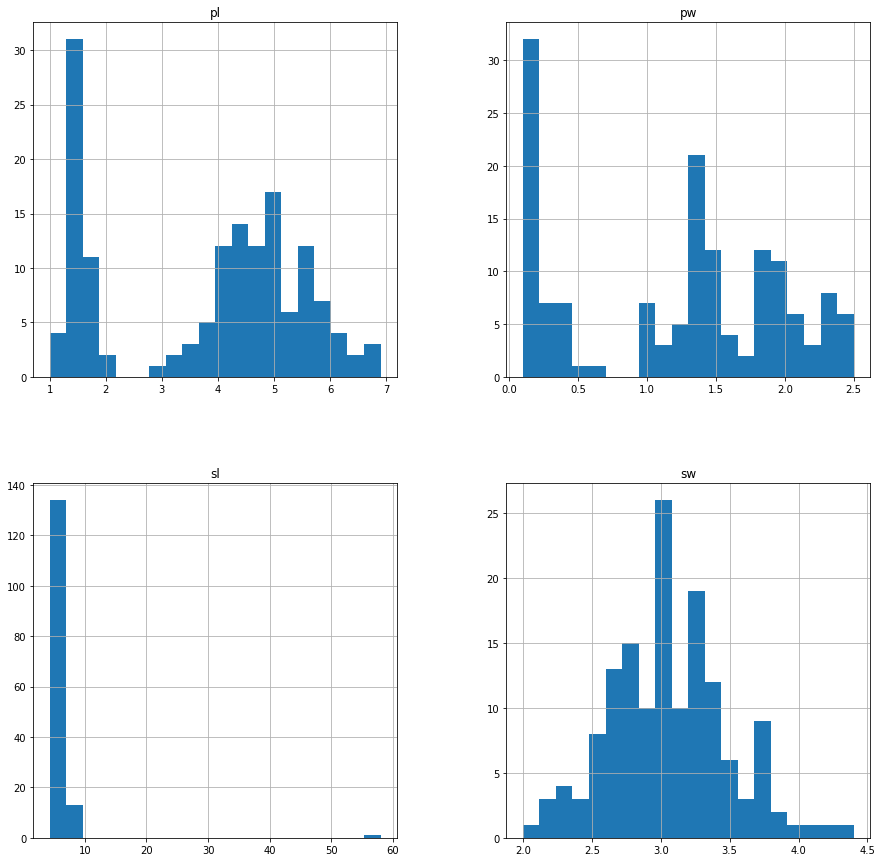

In [43]:
plots = df.hist(figsize=(15, 15), bins=20)

In [44]:
df[df.sl == 58]

,sl,sw,pl,pw,class
143,58.0,2.7,5.1,1.9,Iris-virginica


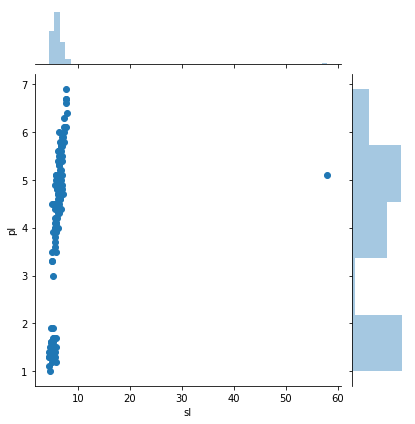

In [45]:
sns.jointplot(df.sl, df.pl)

In [46]:
df[df.sl > 2 * df.sl.mean()]

,sl,sw,pl,pw,class
143,58.0,2.7,5.1,1.9,Iris-virginica


In [47]:
df.loc[143, 'sl'] = 5.8

In [48]:
# sns.jointplot?

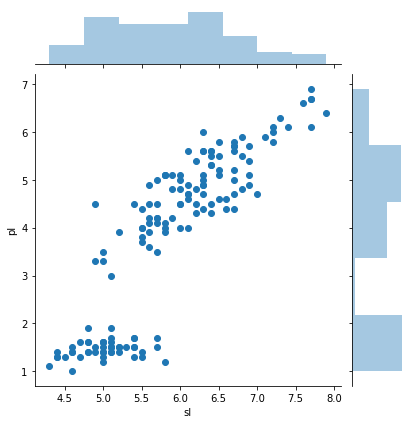

In [49]:
sns.jointplot(df.sl, df.pl)

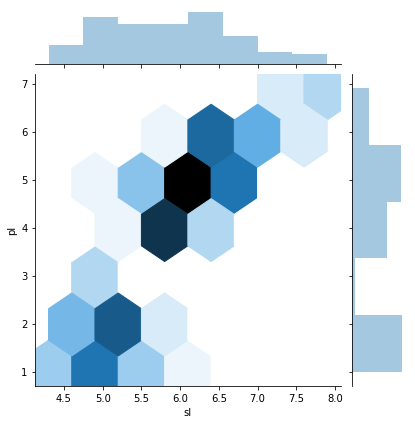

In [50]:
sns.jointplot(df.sl, df.pl, kind='hex')

In [51]:
df.corr() # Compute pairwise correlation of columns, excluding NA/null values, pearson

,sl,sw,pl,pw
sl,1.000000,-0.108879,0.869281,0.814322
sw,-0.108879,1.000000,-0.423748,-0.359944
pl,0.869281,-0.423748,1.000000,0.961975
pw,0.814322,-0.359944,0.961975,1.000000


In [52]:
corrmat = df.corr()

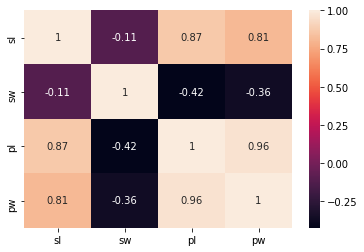

In [53]:
sns.heatmap(corrmat, annot=True)

## Save data

In [54]:
df.to_csv("iris_cleaned.csv", index=False, header=True)

## Additional visualizations

Iris-setosa             AxesSubplot(0.1,0.559091;0.363636x0.340909)
Iris-versicolor    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Iris-virginica              AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

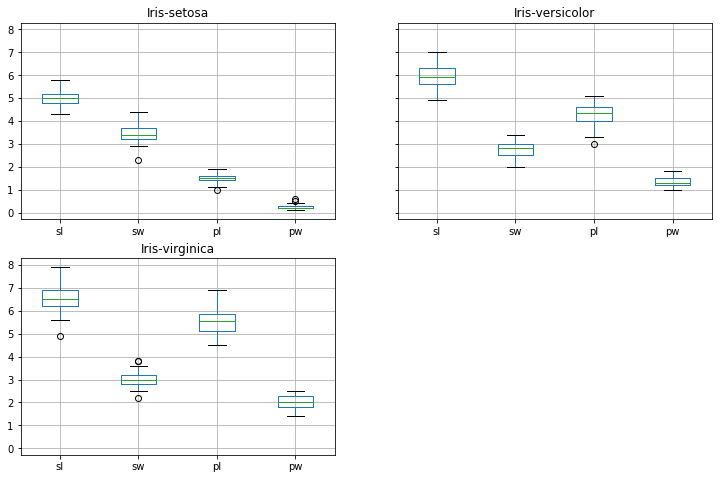

In [55]:
df.groupby('class').boxplot(figsize=(12, 8))

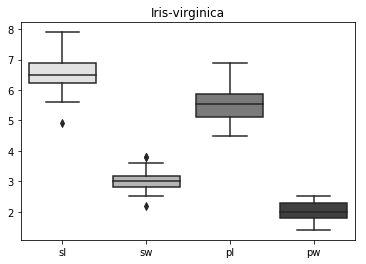

In [56]:
klass = "Iris-virginica"
ax = sns.boxplot(data=df[df['class'] == klass], palette='Greys')
_ = ax.set_title(klass)

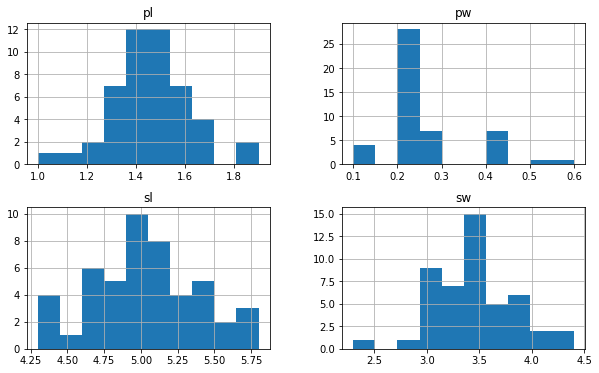

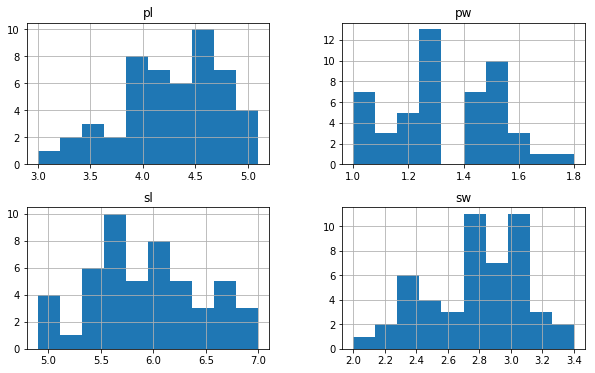

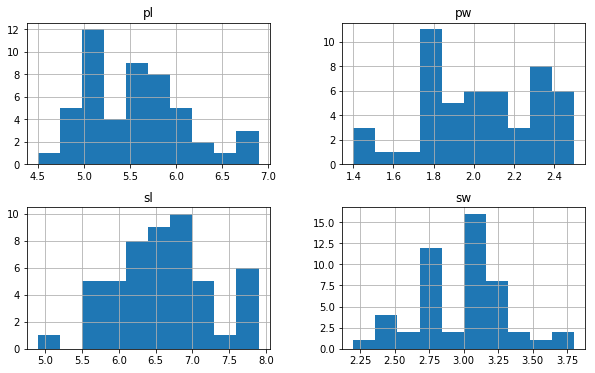

In [57]:
axes = df.groupby('class').hist(layout=(2, 2), figsize=(10, 6))

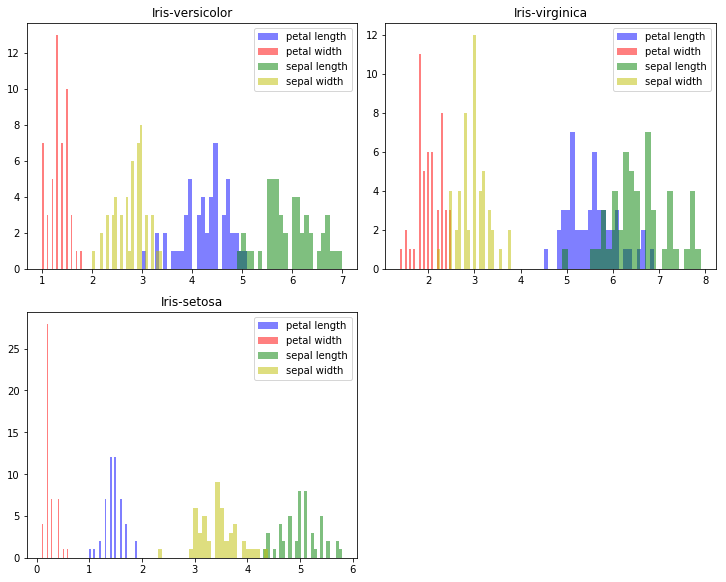

In [58]:
plt.figure(figsize=(10, 8))
for num, klass in enumerate(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa'], start=1):
    plt.subplot(2, 2, num)
    plt.hist(df[df['class'] == klass].pl, bins=25, alpha=0.5, label='petal length', color='b')
    plt.hist(df[df['class'] == klass].pw, bins=25, alpha=0.5, label='petal width', color='r')
    plt.hist(df[df['class'] == klass].sl, bins=25, alpha=0.5, label='sepal length', color='g')
    plt.hist(df[df['class'] == klass].sw, bins=25, alpha=0.5, label='sepal width', color='y')

    plt.legend(loc='best')
    plt.title(klass)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

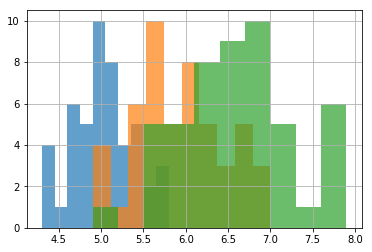

In [59]:
ax = df.groupby('class').sl.hist(alpha=0.7)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x110326dd8>,
      dtype=object)

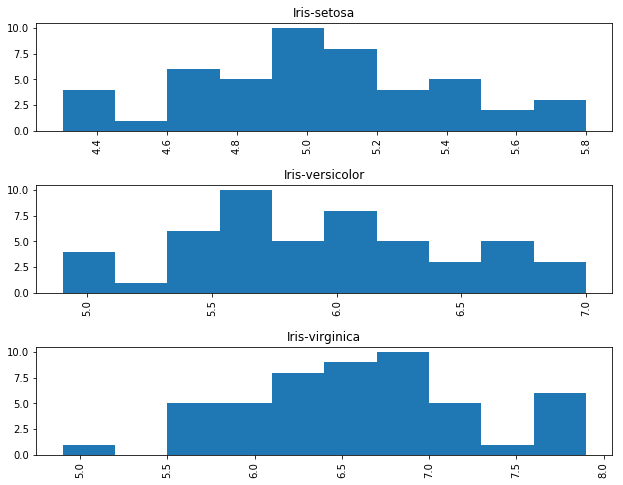

In [60]:
df.hist(column='sl', by='class', layout=(3, 1), figsize=(10, 8))